# Imports

In [15]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Load processed data and merge into one DataFrame

In [16]:
dataset_file_name = 'train2'
df = pd.read_csv(f'../data/raw/{dataset_file_name}.csv')

processed_data_file_names = ['train2_nt_usage_features']

for file in processed_data_file_names:
    current_df = pd.read_csv(f'../data/processed/{file}.csv')
    print(current_df.columns.difference(df.columns)[:5].to_list())  # Display first 5 features to verify successful loading

    df = pd.merge(df, current_df, how='left')


['GC_percentage', 'GC_percentage_0_100', 'GC_percentage_0_500', 'GC_percentage_100_200', 'GC_percentage_150_250']


# Make sure there is nothing missing in the data because that would screw up the correlation calculations

In [17]:
# Count rows and columns with missing values
missing_rows = df.isna().any(axis=1).sum()
missing_columns = df.isna().any(axis=0).sum()

print(f"Number of rows with missing values: {missing_rows}")
print(f"Number of columns with missing values: {missing_columns}")

# Drop empty rows and columns
df = df.dropna(axis=0, how="any").dropna(axis=1, how="any")

# Sanity check
assert not df.isna().any().any()


Number of rows with missing values: 18
Number of columns with missing values: 2047


# Compute Spearman correlations between each selected feature and the expression level

In [18]:
feature_cols = df.columns.difference(['promoter', 'mrna_level']).to_list()
correlations = {}


for col in feature_cols:
    corr, p_value = spearmanr(df[col], df['mrna_level'])
    correlations[col] = {'correlation': corr, 'p_value': p_value}

# Sort from high correlation to low, and print results

In [19]:
features_sorted_by_correlations = sorted(correlations.keys(), key=lambda f: abs(correlations[f]['correlation']), reverse=True)

for feature in features_sorted_by_correlations:
    print(f"{feature}: Correlation = {correlations[feature]['correlation']}, P-value = {correlations[feature]['p_value']}")

count_AT_900_1000: Correlation = -0.24149537950280558, P-value = 2.241871802792863e-43
GC_percentage_800_1000: Correlation = 0.2287059792377346, P-value = 5.7729345991950895e-39
GC_percentage_900_1000: Correlation = 0.216054645804761, P-value = 7.343369349092072e-35
count_C_900_1000: Correlation = 0.2078086602644329, P-value = 2.540156841489672e-32
count_C_800_1000: Correlation = 0.20756888351175015, P-value = 2.999816600946058e-32
count_AT_800_1000: Correlation = -0.2051316353512127, P-value = 1.6078447454989411e-31
count_AAT_900_1000: Correlation = -0.2007270138549955, P-value = 3.166300621083816e-30
count_ATT_800_1000: Correlation = -0.19210588471165926, P-value = 8.855346053781663e-28
count_AAT_800_1000: Correlation = -0.18305143518567263, P-value = 2.4799207150133736e-25
GC_percentage_850_950: Correlation = 0.17252917846373667, P-value = 1.2096370124822965e-22
count_ATT_900_1000: Correlation = -0.17217170037891702, P-value = 1.482743733602091e-22
count_CC_900_1000: Correlation = 0

# Plot some higly correlated features

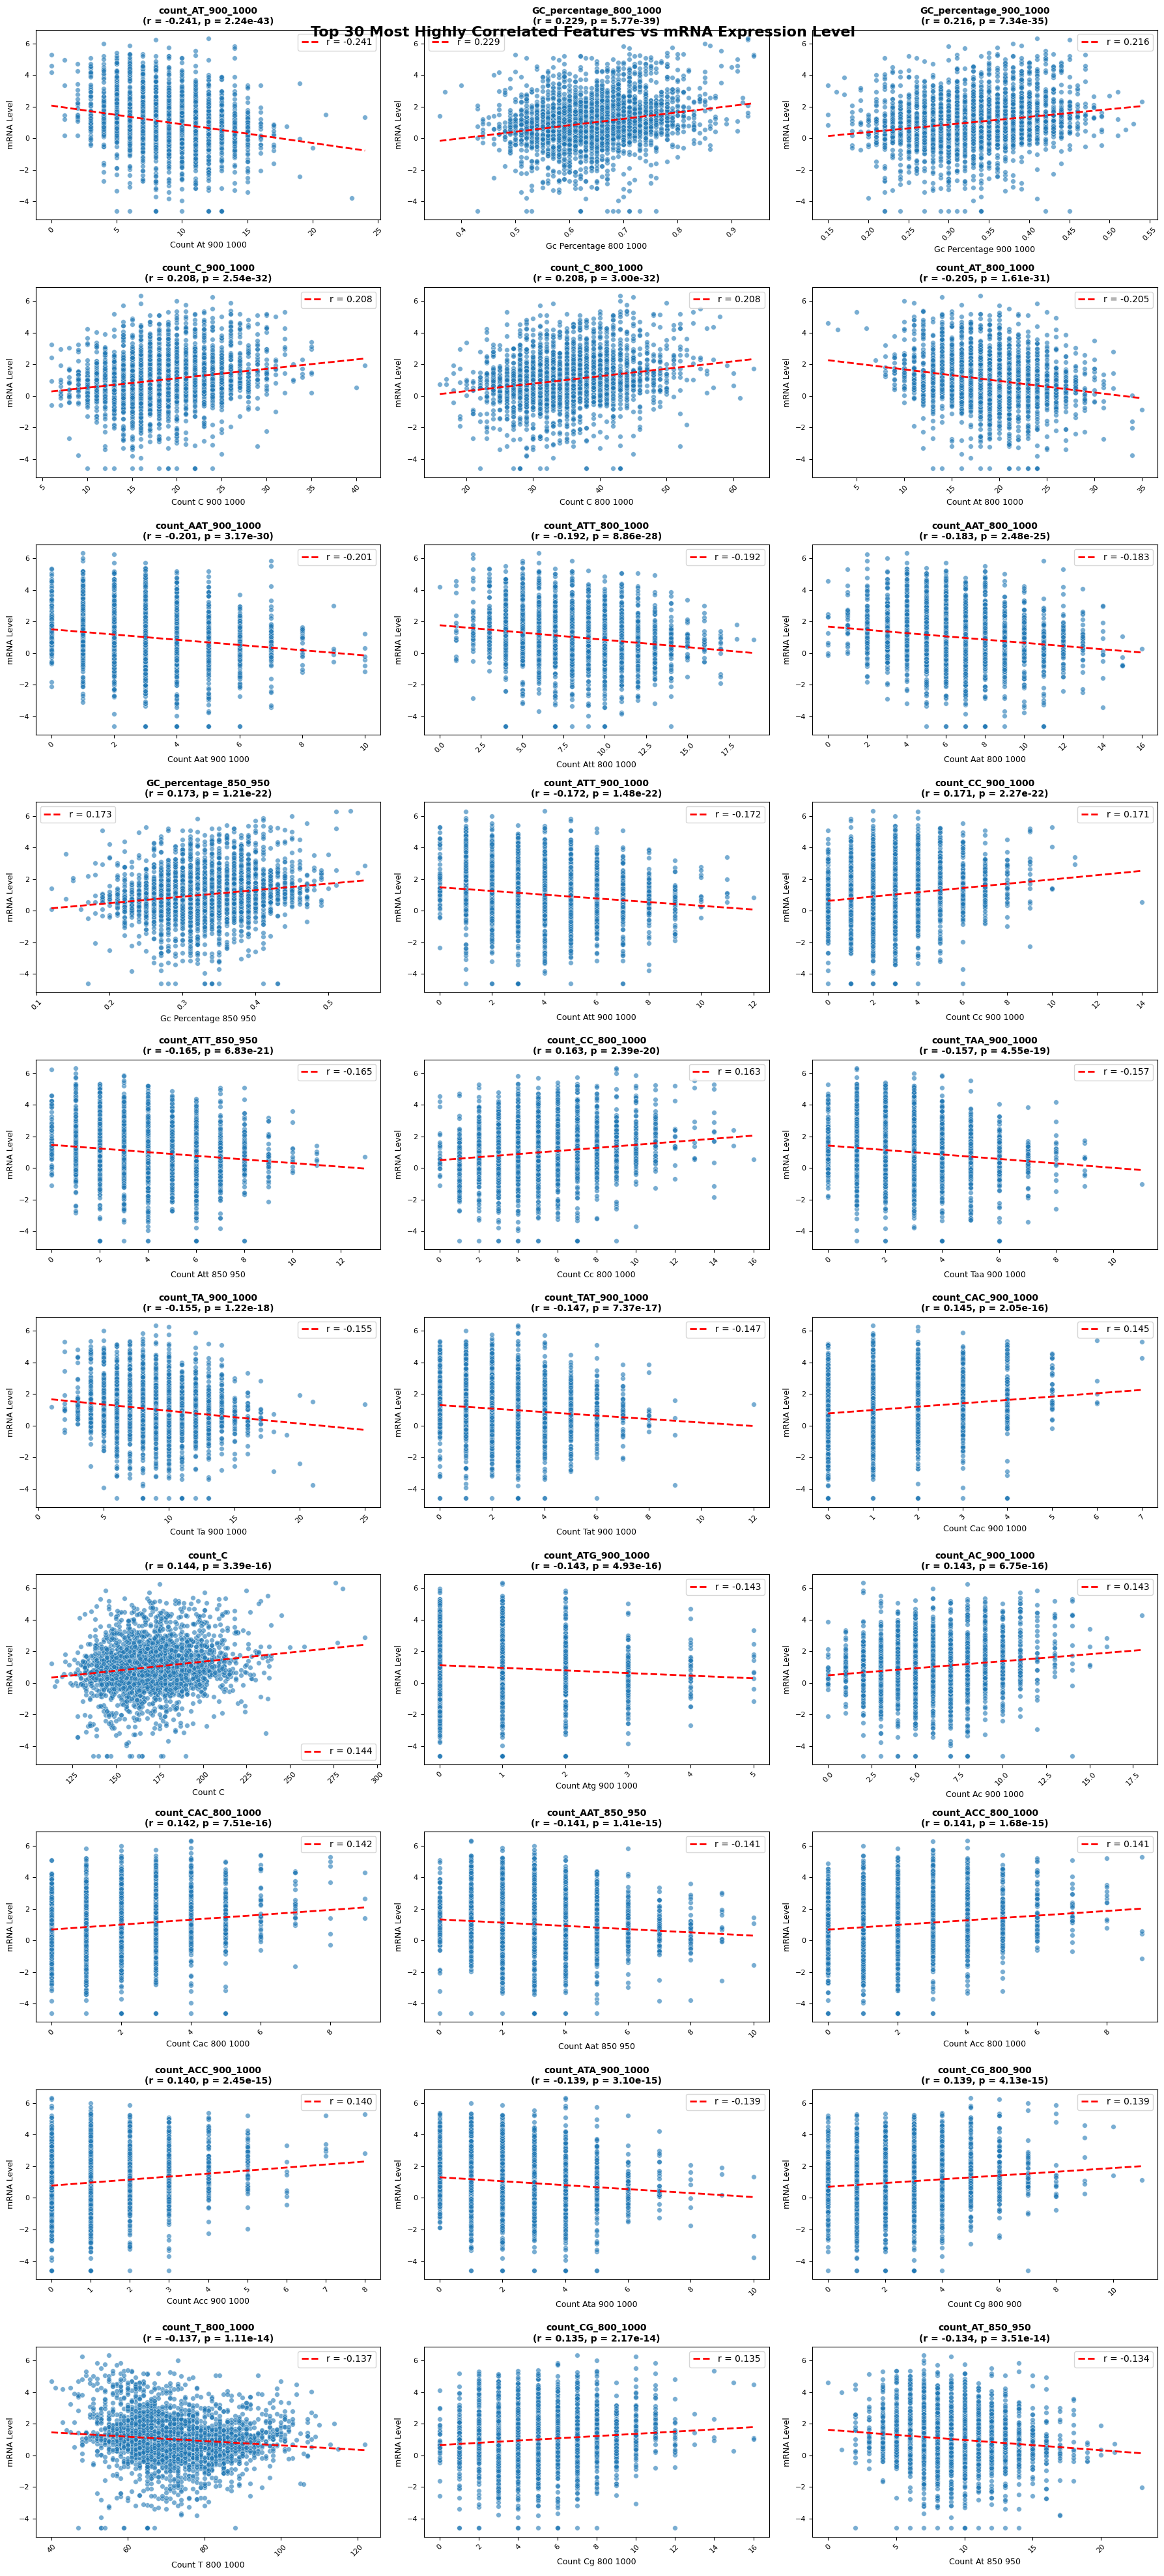


Top 30 features summary:
1. count_AT_900_1000: r = -0.241, p = 2.24e-43
2. GC_percentage_800_1000: r = 0.229, p = 5.77e-39
3. GC_percentage_900_1000: r = 0.216, p = 7.34e-35
4. count_C_900_1000: r = 0.208, p = 2.54e-32
5. count_C_800_1000: r = 0.208, p = 3.00e-32
6. count_AT_800_1000: r = -0.205, p = 1.61e-31
7. count_AAT_900_1000: r = -0.201, p = 3.17e-30
8. count_ATT_800_1000: r = -0.192, p = 8.86e-28
9. count_AAT_800_1000: r = -0.183, p = 2.48e-25
10. GC_percentage_850_950: r = 0.173, p = 1.21e-22
11. count_ATT_900_1000: r = -0.172, p = 1.48e-22
12. count_CC_900_1000: r = 0.171, p = 2.27e-22
13. count_ATT_850_950: r = -0.165, p = 6.83e-21
14. count_CC_800_1000: r = 0.163, p = 2.39e-20
15. count_TAA_900_1000: r = -0.157, p = 4.55e-19
16. count_TA_900_1000: r = -0.155, p = 1.22e-18
17. count_TAT_900_1000: r = -0.147, p = 7.37e-17
18. count_CAC_900_1000: r = 0.145, p = 2.05e-16
19. count_C: r = 0.144, p = 3.39e-16
20. count_ATG_900_1000: r = -0.143, p = 4.93e-16
21. count_AC_900_1000:

In [20]:
# Plot the top 30 most highly correlated features as scatter plots
top_30_features = features_sorted_by_correlations[:30]

# Create subplots: 10 rows x 3 columns
fig, axes = plt.subplots(10, 3, figsize=(18, 40))
axes = axes.flatten()

for i, feature in enumerate(top_30_features):
    ax = axes[i]

    # Create scatter plot
    sns.scatterplot(data=df, x=feature, y='mrna_level', ax=ax, alpha=0.6, s=30)

    # Add correlation line (optional - linear regression)
    try:
        from scipy.stats import linregress
        slope, intercept, r_value, p_value, std_err = linregress(df[feature], df['mrna_level'])
        x_range = [df[feature].min(), df[feature].max()]
        y_range = [slope * x + intercept for x in x_range]
        ax.plot(x_range, y_range, color='red', linestyle='--', linewidth=2,
                label=f'r = {correlations[feature]["correlation"]:.3f}')
        ax.legend()
    except:
        pass

    # Set titles and labels
    ax.set_title(f'{feature}\n(r = {correlations[feature]["correlation"]:.3f}, p = {correlations[feature]["p_value"]:.2e})',
                fontsize=10, fontweight='bold')
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=9)
    ax.set_ylabel('mRNA Level', fontsize=9)

    # Rotate x-axis labels if needed
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.suptitle('Top 30 Most Highly Correlated Features vs mRNA Expression Level', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Print summary of top features
print("\nTop 30 features summary:")
for i, feature in enumerate(top_30_features, 1):
    corr = correlations[feature]['correlation']
    p_val = correlations[feature]['p_value']
    print(f"{i}. {feature}: r = {corr:.3f}, p = {p_val:.2e}")